# Utilitary functions

Study useful functions for ml

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid function

the sigmoid function bijects the real number line in the [-1,1] segment.

It is usefull to compute probabilities from real scores

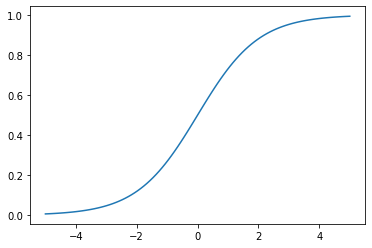

In [2]:
def S(x):
    return np.exp(x)/(1+np.exp(x))

X = np.linspace(-5,5,100)
Y = S(X)

plt.plot(X,Y)

It's derivative is a bell shaped curve, and it has a recursive expression

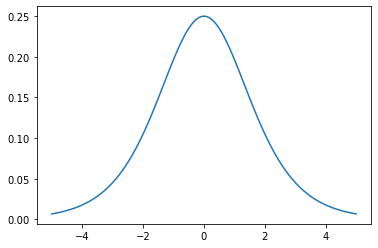

In [3]:
dS2 = S(X)*(1-S(X))

plt.plot(X,dS2)

### Gradient descent

The gradient descent is the workhorse of ML, it mainly allows to optimize convex functions, such as error functions, and can be implemented in many ways

In [4]:
def grad(func,point,dh):
    dim = point.size
    gd = np.zeros((dim))
    for i in range(dim):
        dn = np.zeros((dim))
        dn[i] = dh/2
        gd[i] = (func(point+dn)-func(point-dn))/dh
    return gd

def gradStep(func,point,dh,step):
    gd = grad(func,point,dh)
    return point-step*gd


In [5]:
def f2(P):
    return P[0]**2+P[1]**2

P = np.array([3,2])
print(P,f2(P))
for i in range(10):
    P = gradStep(f2,P,0.0001,0.1)
    print(P,f2(P))

[3 2] 13
[2.4 1.6] 8.320000000004011
[1.92 1.28] 5.324800000003957
[1.536 1.024] 3.407871999998733
[1.2288 0.8192] 2.1810380799960036
[0.98304 0.65536] 1.3958643711968735
[0.786432 0.524288] 0.8933531975662655
[0.6291456 0.4194304] 0.5717460464424369
[0.50331648 0.33554432] 0.3659174697231514
[0.40265318 0.26843546] 0.23418718062286992
[0.32212255 0.21474836] 0.14987979559865772


Another less computationally intensive implementation is the stochastic gradient descent :

In [6]:
def StochGradStep(func,point,dh,step,coord):
    dn = np.zeros(point.shape)
    dn[coord] = dh/2
    df = (func(point+dn)-func(point-dn))/dh
    newPoint = point.copy()
    newPoint[coord] = point[coord]-step*df
    return newPoint

In [7]:
P = np.array([3.0,2.0])
print(P,f2(P))
for i in range(10):
    P = StochGradStep(f2,P,0.0001,0.1,i%2)
    print(P,f2(P))

[3. 2.] 13.0
[2.4 2. ] 9.760000000006713
[2.4 1.6] 8.320000000009696
[1.92 1.6 ] 6.2464000000099205
[1.92 1.28] 5.324800000008504
[1.536 1.28 ] 3.9976960000032085
[1.536 1.024] 3.407872000002371
[1.2288 1.024 ] 2.5585254399999777
[1.2288 0.8192] 2.1810380799996416
[0.98304 0.8192 ] 1.6374562815991691
[0.98304 0.65536] 1.3958643711992018


these implementations are embeded in the optimize module :

In [15]:
import optimize as opt

startPoint = np.array([6,-1])
gdOpt = opt.GradOptimizer(f2,startPoint)
(Pf,Vf) = gdOpt.optimize(0.01,0.00001)
print(Pf,Vf)

[37, 35.53480000000087]
[ 0.01517294 -0.00252882] 0.00023661296298129578


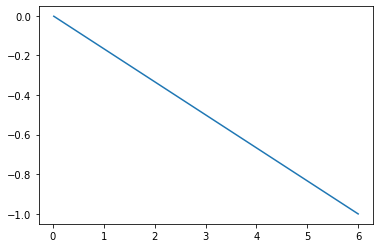

In [16]:
x = [P[0] for P in gdOpt.getPoints()]
y = [P[1] for P in gdOpt.getPoints()]

plt.plot(x,y)

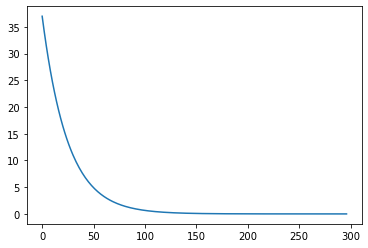

In [17]:
i = range(len(gdOpt.getPoints()))
V = gdOpt.getValues()

plt.plot(i,V)